# Get the Data


## Libraries and Path

In [162]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

## Functions

In [60]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



In [44]:
fetch_housing_data()

In [45]:
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [48]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


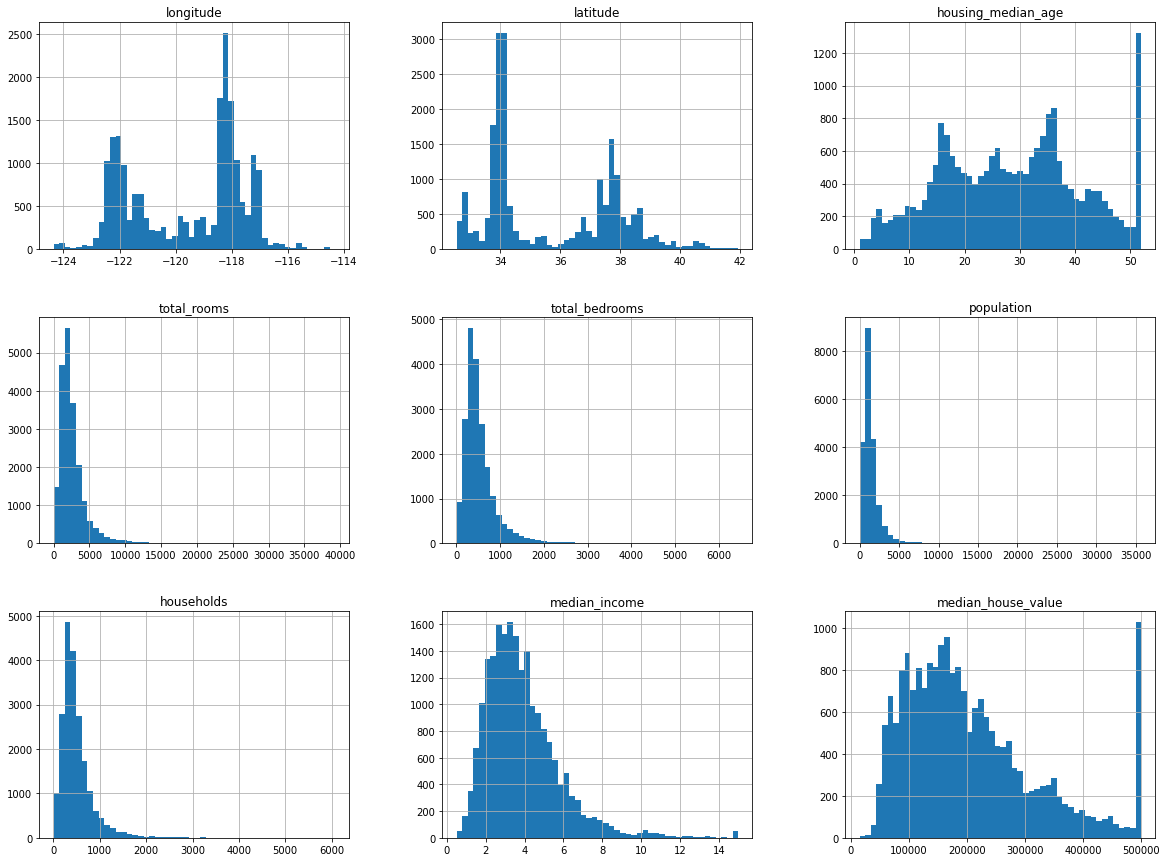

In [51]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Data Testing

In [97]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [98]:

train_set, test_set = split_train_test(df, 0.2)

In [99]:
print(f"Len Train {len(train_set)} Len Test {len(test_set)}")

Len Train 16512 Len Test 4128


Functions to split data to get same result everytime

In [100]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [102]:
housing_with_id = df.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [104]:
housing_with_id["id"] = df["longitude"] * 1000 + df["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [141]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [142]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

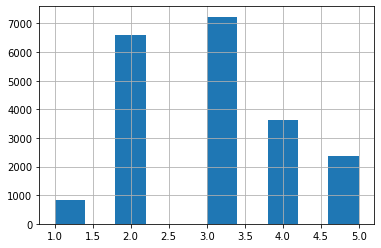

In [143]:
df["income_cat"].hist()

In [150]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=322)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [151]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

With similar code you can measure the income category proportions in the full dataset. Figure 2-10 compares the income category proportions in the overall dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling. As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

![image.png](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0210.png)

In [152]:
#Remove the income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small, so you can just work directly on the full set. Let’s create a copy so that you can play with it without harming the training set:

In [154]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

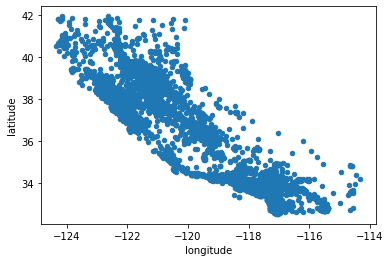

In [155]:
housing.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

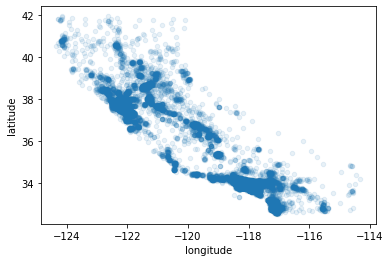

In [156]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)



The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

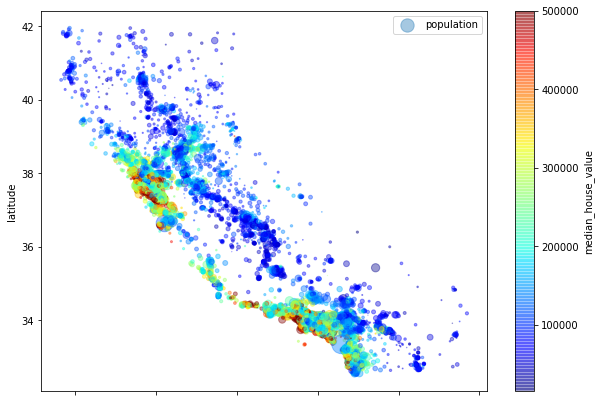

In [157]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Looking for Correlations
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to 0 mean that there is no linear correlation. Figure 2-14 shows various plots along with the correlation coefficient between their horizontal and vertical axes.


The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to 0, then y generally goes up”). Note how all the plots of the bottom row have a correlation coefficient equal to 0, despite the fact that their axes are clearly not independent: these are examples of nonlinear relationships. Also, the second row shows examples where the correlation coefficient is equal to 1 or –1; notice that this has nothing to do with the slope. For example, your height in inches has a correlation coefficient of 1 with your height in feet or in nanometers.
![image.png](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0214.png)
Figure 2-14 



In [158]:
corr_matrix = housing.corr()

In [159]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688902
total_rooms           0.138362
housing_median_age    0.102695
households            0.072155
total_bedrooms        0.056975
population           -0.018974
longitude            -0.046932
latitude             -0.143042
Name: median_house_value, dtype: float64

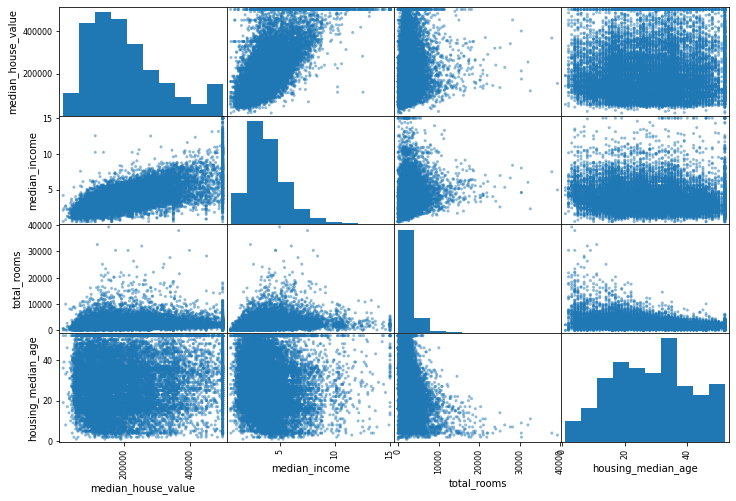

In [168]:

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

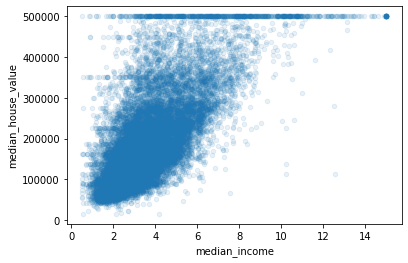

In [169]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

## Experimenting with Attribute Combinations

In [170]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [171]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688902
rooms_per_household         0.151412
total_rooms                 0.138362
housing_median_age          0.102695
households                  0.072155
total_bedrooms              0.056975
population                 -0.018974
population_per_household   -0.022071
longitude                  -0.046932
latitude                   -0.143042
bedrooms_per_room          -0.253232
Name: median_house_value, dtype: float64

In [173]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12146,-117.20,33.72,8.0,5528.0,1073.0,1674.0,918.0,2.5335,110100.0,<1H OCEAN,6.021786,0.194103,1.823529
3626,-118.43,34.24,35.0,1488.0,293.0,1112.0,288.0,4.4688,182500.0,<1H OCEAN,5.166667,0.196909,3.861111
5510,-118.42,33.99,38.0,740.0,171.0,599.0,194.0,4.0893,248900.0,<1H OCEAN,3.814433,0.231081,3.087629
3665,-118.37,34.22,17.0,1787.0,463.0,1671.0,448.0,3.5521,151500.0,<1H OCEAN,3.988839,0.259093,3.729911
15773,-122.45,37.76,50.0,2518.0,507.0,979.0,516.0,4.6912,500001.0,NEAR BAY,4.879845,0.201350,1.897287
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20050,-119.31,35.99,26.0,1460.0,316.0,880.0,286.0,1.3676,47800.0,INLAND,5.104895,0.216438,3.076923
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,231700.0,NEAR OCEAN,4.099870,NaN,2.418936
3231,-119.57,36.27,20.0,2673.0,452.0,1394.0,449.0,2.6250,97400.0,INLAND,5.953229,0.169098,3.104677
14486,-117.25,32.86,30.0,1670.0,219.0,606.0,202.0,12.4429,500001.0,NEAR OCEAN,8.267327,0.131138,3.000000


# Prepare the Data for Machine Learning Algorithms

In [214]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"]

In [235]:
housing['total_bedrooms'].isna().value_counts()

False    16347
True       165
Name: total_bedrooms, dtype: int64

In [232]:
housing.isna().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  ocean_proximity
False      False     False               False        False           False       False       False          False              16347
                                                      True            False       False       False          False                165
dtype: int64

## Data Cleaning
Get rid of the corresponding districts.

Get rid of the whole attribute.

Set the values to some value (zero, the mean, the median, etc.).

In [210]:
#housing.dropna(subset=["total_bedrooms"])    # option 1
#housing.drop("total_bedrooms", axis=1)       # option 2
#median = housing["total_bedrooms"].median()  # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [219]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you need to create a copy of the data without the text attribute ocean_proximity:

In [225]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [236]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2129.5   ,  437.    , 1168.    ,
        411.    ,    3.5338])

In [237]:
 housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2129.5   ,  437.    , 1168.    ,
        411.    ,    3.5338])

Now you can use this “trained” imputer to transform the training set by replacing missing values with the learned medians:

In [238]:
X = imputer.transform(housing_num)

array([[-117.2   ,   33.72  ,    8.    , ..., 1674.    ,  918.    ,
           2.5335],
       [-118.43  ,   34.24  ,   35.    , ..., 1112.    ,  288.    ,
           4.4688],
       [-118.42  ,   33.99  ,   38.    , ...,  599.    ,  194.    ,
           4.0893],
       ...,
       [-119.57  ,   36.27  ,   20.    , ..., 1394.    ,  449.    ,
           2.625 ],
       [-117.25  ,   32.86  ,   30.    , ...,  606.    ,  202.    ,
          12.4429],
       [-117.93  ,   33.66  ,   18.    , ...,  702.    ,  246.    ,
           9.6062]])

In [240]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

## Handling Text and Categorical Attributes


If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). Alternatively, you could replace each category with a learnable, low-dimensional vector called an embedding. Each category’s representation would be learned during training. This is an example of representation learning (see Chapters 13 and 17 for more details).

In [243]:
housing_cat = housing[["ocean_proximity"]]

In [244]:
housing_cat.head(10)

,ocean_proximity
12146,<1H OCEAN
3626,<1H OCEAN
5510,<1H OCEAN
3665,<1H OCEAN
15773,NEAR BAY
4240,<1H OCEAN
19676,INLAND
4430,<1H OCEAN
4754,<1H OCEAN
17855,<1H OCEAN


In [251]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded_hot = onehot_encoder.fit_transform(housing_cat)

In [249]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [248]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [255]:
housing_cat_encoded_hot[:10].toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [254]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [256]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling and Transformation Pipelines
As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

Scikit-Learn provides the Pipeline class to help with such sequences of transformations. 

In [276]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

#We dropped ocean proximity from housing
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [273]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [270]:
housing_prepared.shape

(16512, 16)

# Select and Train a Model

## Training and Evaluating on the Training Set

### Model LinearRegression (Underfit)



In [362]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [291]:
housing.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12146,-117.20,33.72,8.0,5528.0,1073.0,1674.0,918.0,2.5335,<1H OCEAN
3626,-118.43,34.24,35.0,1488.0,293.0,1112.0,288.0,4.4688,<1H OCEAN
5510,-118.42,33.99,38.0,740.0,171.0,599.0,194.0,4.0893,<1H OCEAN
3665,-118.37,34.22,17.0,1787.0,463.0,1671.0,448.0,3.5521,<1H OCEAN
15773,-122.45,37.76,50.0,2518.0,507.0,979.0,516.0,4.6912,NEAR BAY


In [363]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [364]:
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [176563.99966104 238832.82480797 240313.9763788  184149.47508273
 309993.25210078]
Labels: [110100.0, 182500.0, 248900.0, 151500.0, 500001.0]


This is better than nothing, but clearly not a great score: most districts’ median_housing_values range between 120,000 and 265,000, so a typical prediction error of 68,628 is not very satisfying

In [365]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68468.61873790421

### Model Decision Tree (Overfit)

In [381]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [382]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [383]:
from sklearn.model_selection import cross_val_score

In [384]:
def display_scores(scores):
    print("Scores RMSE:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    

### Cross Validated Decision Tree

Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of approximately 71,407, generally ±2,439. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.

In [387]:
#Read above in Better Evaluation Using Cross-Validation
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [388]:
display_scores(tree_rmse_scores)

Scores RMSE: [69109.34984301 69294.40551729 64803.50704565 67571.9942717
 67158.70393265 68848.15667083 64663.662559   67864.81330691
 69757.50503341 68655.36509135]
Mean: 67772.74632718143
Standard deviation: 1699.5692286234716


### Cross Validated Linear Regression

Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

In [379]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [380]:
display_scores(lin_rmse_scores)

Scores RMSE: [66937.03562314 67300.66455707 69356.77414863 68126.64073382
 68959.4093809  70973.89151709 65595.29827001 71382.15067
 70327.88723645 66767.67342899]
Mean: 68572.74255660914
Standard deviation: 1847.1387434655744


## A Better Model

In [397]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [398]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18339.867829462673

In [399]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [400]:
display_scores(forest_rmse_scores)

Scores RMSE: [47016.06216741 50111.00778646 50348.06229719 49741.04675657
 49085.5693137  52087.09476933 46187.14619091 50435.31216231
 49425.58674748 48280.34321278]
Mean: 49271.72314041344
Standard deviation: 1643.3870200024971
